In [71]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt

用padas_datareader aka data 获取数据

In [41]:
start_date = '2014-01-01'
end_date = '2018-01-01'
goog_data = data.DataReader('goog', 'yahoo', start_date, end_date)


In [42]:
goog_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


In [48]:
data = pd.DataFrame(goog_data['Adj Close'], index=goog_data.index)

In [49]:
data

,Adj Close
Date,
2014-01-02,554.481689
2014-01-03,550.436829
2014-01-06,556.573853
2014-01-07,567.303589
2014-01-08,568.484192
...,...
2017-12-22,1060.119995
2017-12-26,1056.739990
2017-12-27,1049.369995


In [43]:
goog_data_signal = pd.DataFrame(index = goog_data.index)

In [50]:
goog_data_signal['price'] = goog_data['Adj Close']

In [51]:
goog_data_signal['daily_diff'] = goog_data_signal['price'].diff()

In [53]:
print(goog_data_signal.head())

                 price  daily_diff
Date                              
2014-01-02  554.481689         NaN
2014-01-03  550.436829   -4.044861
2014-01-06  556.573853    6.137024
2014-01-07  567.303589   10.729736
2014-01-08  568.484192    1.180603


In [54]:
goog_data_signal['signal'] = 0.0

np.where(数据，对比值，正确填1，非正确填0)

In [56]:
goog_data_signal['signal'] = np.where(goog_data_signal['daily_diff']>0, 1.0, 0.0)

In [65]:
goog_data_signal.head()

,price,daily_diff,signal
Date,,,
2014-01-02,554.481689,NaN,0.0
2014-01-03,550.436829,-4.044861,0.0
2014-01-06,556.573853,6.137024,1.0
2014-01-07,567.303589,10.729736,1.0
2014-01-08,568.484192,1.180603,1.0


In [66]:
goog_data_signal['positions'] = goog_data_signal['signal'].diff()

In [70]:
goog_data_signal.head(10)

,price,daily_diff,signal,positions
Date,,,,
2014-01-02,554.481689,NaN,0.0,NaN
2014-01-03,550.436829,-4.044861,0.0,0.0
2014-01-06,556.573853,6.137024,1.0,1.0
2014-01-07,567.303589,10.729736,1.0,0.0
2014-01-08,568.484192,1.180603,1.0,0.0
2014-01-09,563.009705,-5.474487,0.0,-1.0
2014-01-10,562.979797,-0.029907,0.0,0.0
2014-01-13,559.393250,-3.586548,0.0,0.0
2014-01-14,572.553955,13.160706,1.0,1.0


简单的趋势信号就做好了，1.6号买，1.9号卖，不考虑手续费，盈利为：

In [64]:
goog_data_signal.loc['2014-01-09'].price - goog_data_signal.loc['2014-01-06'].price

6.43585205078125

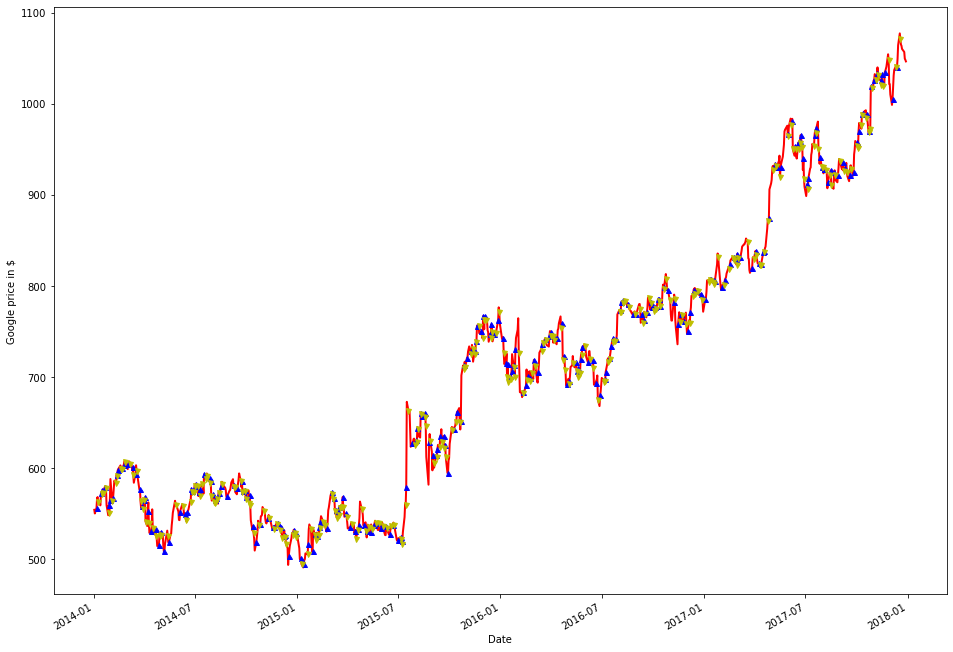

In [84]:
fig =  plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2) # ax1

ax1.plot(goog_data_signal.loc[goog_data_signal.positions ==  1.0].index,
        goog_data_signal.price[goog_data_signal.positions == 1.0],
        '^', markersize=5, color='b') #在ax1中，指定横坐标和纵坐标，来输出标记

ax1.plot(goog_data_signal.loc[goog_data_signal.positions ==  -1.0].index,
        goog_data_signal.price[goog_data_signal.positions == -1.0],
        'v', markersize=5, color='y') #在ax1中，指定横坐标和纵坐标，来输出标记

plt.show()

#### Backtesting


In [95]:
initial_cap = float(1000.0)
positions = pd.DataFrame(index = goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index = goog_data_signal.index).fillna(0.0)
# ?为什么这时的positions只有index没有内容？比如
positions.head(2)

""
Date
2014-01-02
2014-01-03


In [96]:
positions['GOOG'] = goog_data_signal['signal']

In [97]:
positions.head(3)

,GOOG
Date,
2014-01-02,0.0
2014-01-03,0.0
2014-01-06,1.0


In [98]:
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
# 这种括号里用.multiply()的方式我还是第一次见到

In [100]:
portfolio.head(3)

,positions
Date,
2014-01-02,0.000000
2014-01-03,0.000000
2014-01-06,556.573853


In [102]:
portfolio['cash'] = initial_cap - (positions.diff().multiply(goog_data_signal['price'],
                                                            axis=0)).cumsum()

In [103]:
portfolio.head(3)

,positions,cash
Date,,
2014-01-02,0.000000,NaN
2014-01-03,0.000000,1000.000000
2014-01-06,556.573853,443.426147


In [104]:
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [107]:
portfolio.tail(3)

,positions,cash,total
Date,,,
2017-12-27,0.0,1253.277466,1253.277466
2017-12-28,0.0,1253.277466,1253.277466
2017-12-29,0.0,1253.277466,1253.277466


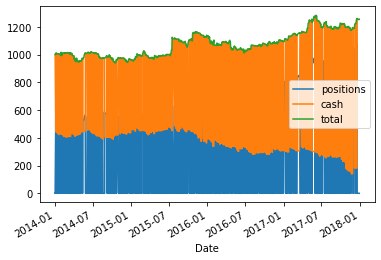

In [108]:
portfolio.plot();